In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as la
from matplotlib.colors import ListedColormap

In [2]:
def find_distance_vector(X, x):
    """Finds distace of point x from each point in training space X."""
    X = np.array(X)
    x = np.array(x)
    distances = []
    for point in X:
        distances.append(la.norm(point-x))
    return distances

def find_nearest_neighbor_indices(distances, k):
    """Finds indices of k nearest neighbors."""
    distances = np.array(distances)
    nn_indices = []
    max_dist_in_array = distances.max()
    for i in range(k):
        min_idx = np.argmin(distances)
        nn_indices.append(min_idx)
        #masking value of min_idx for next iteration
        distances[min_idx] = max_dist_in_array+1
    return nn_indices

def knn_regression(X_train, Y_train, k, X_eval):
    """Performs knn regression to return predicted values"""
    
    Y_eval = []
    for point in X_eval:
        distances = find_distance_vector(X_train, point)
        nn_indices = find_nearest_neighbor_indices(distances, k)
        
        y_eval = sum([Y_train[idx] for idx in nn_indices])/k
        Y_eval.append(y_eval)

    return Y_eval

def knn_classification(X_train, Y_train, k, X_eval):
    """Performs knn classification to return predicted label/class"""
    
    Y_eval = []
    for point in X_eval:
        distances = find_distance_vector(X_train, point)
        nn_indices = find_nearest_neighbor_indices(distances, k)
        
        nn_labels = [Y_train[idx] for idx in nn_indices]
        nn_labels_unique = set(nn_labels)
        
        #finding most frequent label in all neighbors
        max_frequency_label = None
        max_frequency = 0
        for label in nn_labels_unique:
            frequency = nn_labels.count(label)
            if frequency > max_frequency:
                max_frequency = frequency
                max_frequency_label = label
        
        y_eval = max_frequency_label
        Y_eval.append(y_eval)

    return Y_eval

# Regression

## Part a: Example 3.4

In [3]:
X_train = [[0], [1], [2], [3], [4]]
Y_train = [0, 0.3, 0.75, 1, 2]
k = 2

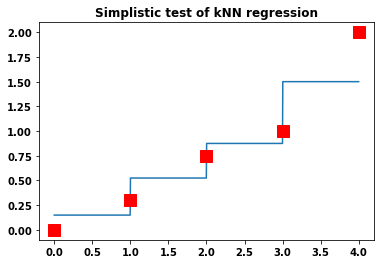

In [4]:
X_eval = np.linspace(0,4,1000)
X_eval = X_eval.reshape(-1,1)

plt.figure()
plt.plot(X_eval, knn_regression(X_train, Y_train, k, X_eval), label="kNN regression predictor")
plt.plot(X_train, Y_train, 'rs', markersize=12, label="trainin set")
plt.title("Simplistic test of kNN regression")
plt.show()

## Part b: Energy efficiency data

Loading data and observing

In [5]:
energy = pd.read_excel('ENB2012_data.xlsx', engine='openpyxl')
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [6]:
energy.shape

(768, 12)

In [7]:
X_train_energy = energy.iloc[:,0:8].values
Y_train_energy = energy['Y1'].values.tolist()

X_eval_energy = energy.iloc[:3,0:8].values

In [8]:
knn_regression(X_train_energy, Y_train_energy, 1, X_eval_energy)

[15.55, 15.55, 15.55]

In [9]:
knn_regression(X_train_energy, Y_train_energy, 3, X_eval_energy)

[18.56, 15.550000000000002, 15.550000000000002]

In [10]:
knn_regression(X_train_energy, Y_train_energy, 10, X_eval_energy)

[24.097, 23.741999999999997, 23.792]

# Classification

## Part c: Example 3.5

Kept the whole code same as in already provided jupyter notebook, only changing the knn classifier line.

In [11]:
N = 30

np.random.seed(123)
X1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([2,0],[[1,0],[0,1]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)

X = np.concatenate((X1,X2,X3));

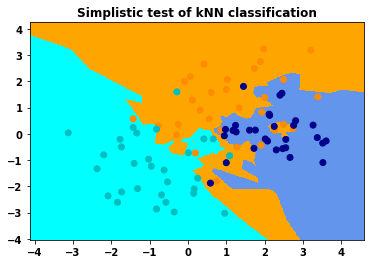

In [12]:
k = 3

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_classification(X[:,[0,1]], X[:,2], k, np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z)

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap=cmap_bold);
plt.title("Simplistic test of kNN classification")
plt.show()

## Part d: Spambase data

In [13]:
spambase = np.loadtxt('spambase.data', delimiter=',')
spambase.shape

(4601, 58)

In [14]:
#checking first row of data
spambase[0,:]

array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
         0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
       278.   ,   1.   ])

In [15]:
X_train_spam = spambase[:,:57]
Y_train_spam = spambase[:,57]

X_eval_spam = spambase[[0,777,4500], :57]

Actual classification of randomly selected datapoints in X_eval:

In [16]:
spambase[[0,777,4500] ,57]


array([1., 1., 0.])

Classification using different k:

In [17]:
knn_classification(X_train_spam, Y_train_spam, 1, X_eval_spam)

[1.0, 1.0, 0.0]

In [18]:
knn_classification(X_train_spam, Y_train_spam, 3, X_eval_spam)

[1.0, 1.0, 0.0]

In [19]:
knn_classification(X_train_spam, Y_train_spam, 10, X_eval_spam)

[1.0, 0.0, 0.0]